In [ ]:
# Import required libraries
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import download

# Download necessary NLTK data
download('stopwords')
download('punkt')

In [4]:
def preprocess_text(series):
    """
    Preprocess a pandas Series containing text data.

    This function performs the following operations:
    - Concatenates all text values in the Series into a single string
    - Converts the text to lowercase
    - Tokenizes the text into individual words
    - Removes English stop words and nonalphabetic strings from the tokens
    - Joins the remaining tokens back into a single string

    Args:
        series (pandas.Series): A pandas Series containing text data.

    Returns:
        str: The preprocessed text as a single string.
    """
    text = " ".join(series.values)
    text = text.lower()

    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and word.isalpha()]

    text = " ".join(tokens)

    return text

In [5]:
# Read the CSV file into a pandas DataFrame, dataset source: https://data.cityofnewyork.us/City-Government/Jobs-NYC-Postings/kpav-sd4t/about_data
path_to_dataset = 'data/Jobs_NYC_Postings_20240703.csv'
jobs = pd.read_csv(path_to_dataset)
display(jobs.head())


,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,546011,DEPT OF ENVIRONMENT PROTECTION,External,1,Director of Digital Transformation,COMPUTER SYSTEMS MANAGER,Competitive-1,10050,M4,"Engineering, Architecture, & Planning",...,Appointments are subject to OMB approval. For...,To Apply: Click Apply Now button,NaN,96-05 Horace Harding Expway,NaN,New York City Residency is not required for th...,08/22/2022,NaN,08/22/2022,07/02/2024
1,613253,DEPT OF DESIGN & CONSTRUCTION,External,1,Director,ADMINISTRATIVE CITY PLANNER,Competitive-1,10053,M2,"Engineering, Architecture, & Planning",...,NaN,Please go to NYC Government Jobs Explore Care...,NaN,NaN,NaN,New York City residency is generally required ...,11/06/2023,NaN,03/05/2024,07/02/2024
2,632439,DEPT OF HEALTH/MENTAL HYGIENE,External,1,Community Engagement Coordinator Shop Healthy,COMMUNITY COORDINATOR,Non-Competitive-5,56058,00,Constituent Services & Community Programs Health,...,NaN,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,04/04/2024,04-OCT-2024,04/04/2024,07/02/2024
3,558349,DEPT OF ENVIRONMENT PROTECTION,External,1,Section Chief of Lifecycle Management,CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,4A,"Engineering, Architecture, & Planning Finance,...",...,Appointments are subject to OMB approval. For...,Click Apply Now button.,35 hours per week/day,"96-05 Horace Harding Expressway Corona, NY 11368",NaN,New York City residency is generally required ...,11/15/2022,NaN,12/06/2022,07/02/2024
4,539902,BRONX DISTRICT ATTORNEY,External,15,Trial Preparation Assistant - Trial Division/H...,COMMUNITY ASSOCIATE,Non-Competitive-5,56057,00,"Legal Affairs Policy, Research & Analysis",...,**LOAN FORGIVENESS: The federal government pro...,We appreciate your interest in a position with...,NaN,NaN,NaN,City Residency is not required for this position,07/12/2022,19-SEP-2024,09/25/2023,07/02/2024


In [6]:
# Select the column to be used for generating the word cloud and preprocess the text
column_for_wordcloud = 'Business Title'
preprocess_text = preprocess_text(jobs[column_for_wordcloud])

print(preprocess_text)

director digital transformation director community engagement coordinator shop healthy section chief lifecycle management trial preparation assistant trial agency chief contracting officer supervising interstate coordinator bureau tuberculosis control chief surgeon health management division maintenance worker quality control case review supervisor director quality assurance project manager division tenant owner resources cyber engagement manager community educator oiler program manager relay bureau alcohol drug use prevention care treatment civil engineer ii clinical social worker bureau public health clinics cost estimating manager assoc chemist senior program coordinator city research scientist level iii construction monitoring project manager per diem eeo investigator community planner job control technician junior digital forensic examiner assistant commissioner transit development deputy director crime victims assistance bureau project manager supervising nurse bureau school heal

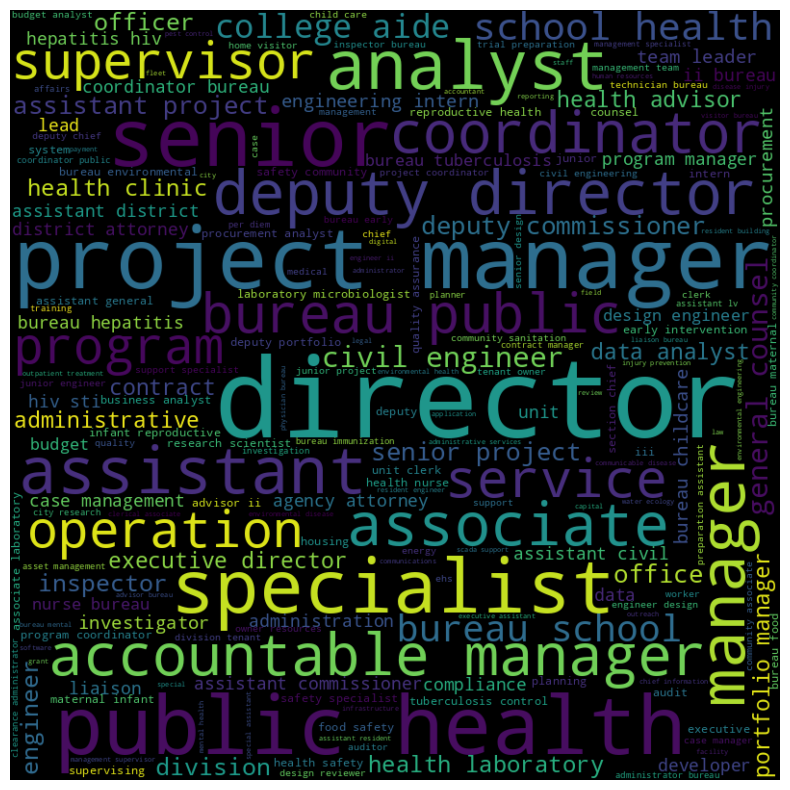

In [7]:
# Generate the word cloud from the preprocessed text
wordcloud = WordCloud(width=800, height=800, background_color="black").generate(preprocess_text)

# Plot and save to file the wordcloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('wordcloud.png', bbox_inches='tight', pad_inches=0, dpi=300)
plt.show()